C:\Users\SIR\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 161s 71ms/step - accuracy: 0.7450 - loss: 0.6940 - val_accuracy: 0.8643 - val_loss: 0.3728
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 219s 92ms/step - accuracy: 0.8783 - loss: 0.3309 - val_accuracy: 0.8897 - val_loss: 0.3088
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 232s 107ms/step - accuracy: 0.8959 - loss: 0.2803 - val_accuracy: 0.8997 - val_loss: 0.2806
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 210s 112ms/step - accuracy: 0.9110 - loss: 0.2424 - val_accuracy: 0.9038 - val_loss: 0.2650
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 184s 70ms/step - accuracy: 0.9183 - loss: 0.2181 - val_accuracy: 0.9030 - val_loss: 0.2658
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 69ms/step - accuracy: 0.9238 - loss: 0.1984 - val_accuracy: 0.9055 - val_loss: 0.2634
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 132s 71ms/step - accuracy: 0.9345 - loss: 0.1767 - val_accuracy: 0.9086 - val_loss: 0.2541
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 65ms/step - accuracy

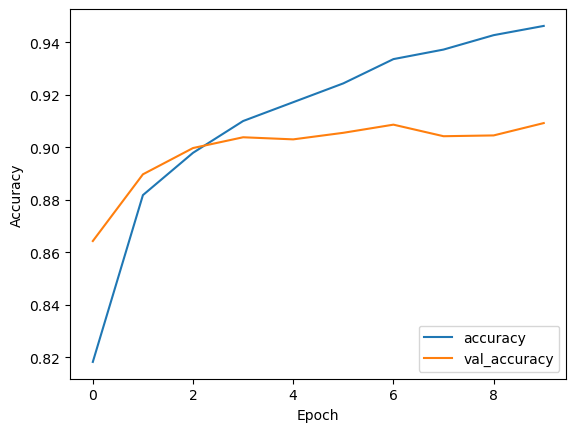

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension for CNN input
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


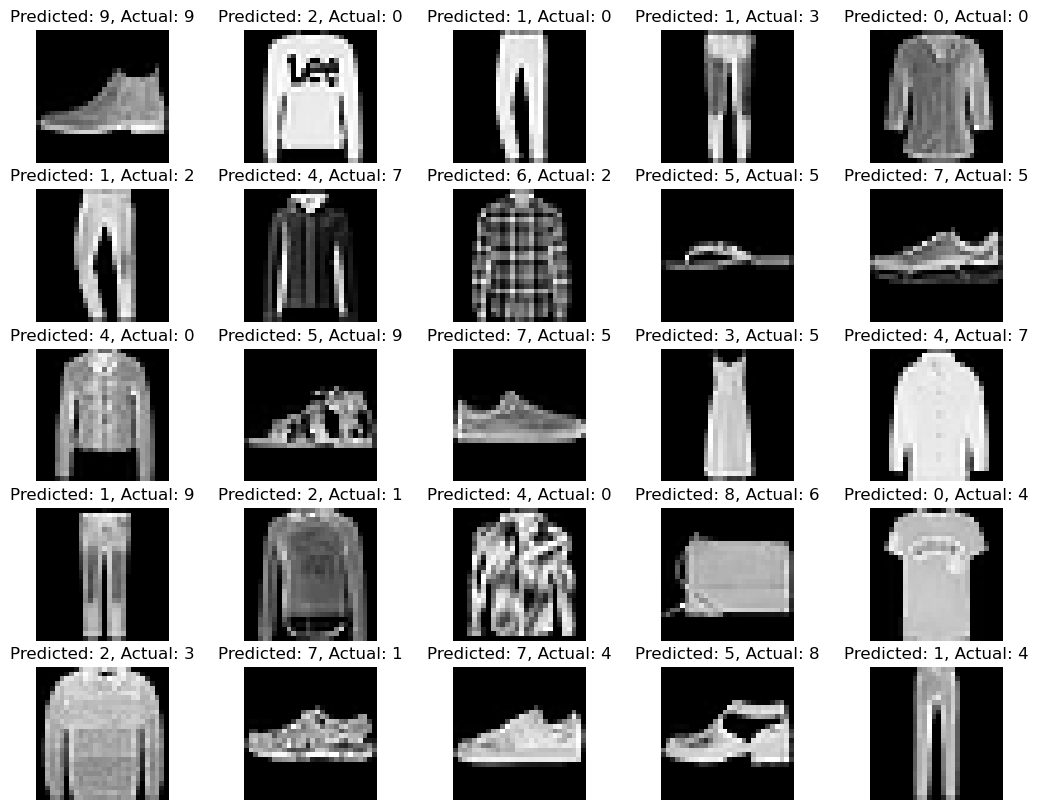

In [5]:
# Make predictions
predictions = model.predict(x_test[..., tf.newaxis])
predicted_labels = [tf.argmax(pred).numpy() for pred in predictions]

# Visualize some predictions
plt.figure(figsize=(13, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {y_train[i]}")
    plt.axis('off')
plt.show()
